In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


# Importing Data and Packages

In [ ]:
import os
n_cpu = os.cpu_count()
n_thread = n_cpu*2


In [ ]:
 df =pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data Visualization and Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape()

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Missing Value

In [ ]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# assuming the dataset is stored in a variable called "data"

# count the number of null values in each column
null_counts = df.isnull().sum()

# sort the columns by the number of null values (in descending order)
null_counts = null_counts.sort_values(ascending=False)

# print the null value counts
print(null_counts)


neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_zero                           0
dtype: int64


In [ ]:
df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis=1, inplace=True)

columns such as name, host_id, host_name, latitude, longitude are not pertinent to our analysis.

In [ ]:
df.fillna('0', inplace=True)

In [ ]:
df.shape

(48895, 9)

## Outliers

In [ ]:
df.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['price'])
plt.title("Distribution of Price")
plt.show()

<AxesSubplot:xlabel='price'>

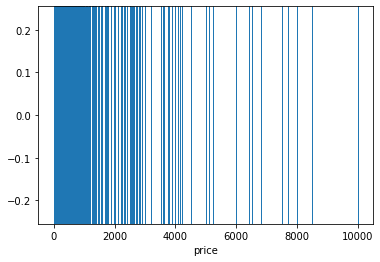

In [ ]:
sns.rugplot(data=df, x='price', height=1)

There are so many outlier in the price. Let's drop them.

In [ ]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
print(p1, p2)

799.0 30.0


In [ ]:
df = df[(df['price']<p1) & (df['price']>p2)]

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=data['price'])
plt.title("Distribution of Price")
plt.show()

we can see the minimum nights here

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=data['minimum_nights'])
plt.title("Distribution of Price")
plt.show()

In [ ]:
m1 = df['minimum_nights'].quantile(0.99)
print(m1)

40.0


In [ ]:
df = df[(df['minimum_nights']<m1)]

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(y=data['minimum_nights'])
plt.title("Distribution of Price")
plt.show()

In [ ]:
df['reviews_per_month']

0        0.21
1        0.38
2           0
3        4.64
4         0.1
         ... 
48890       0
48891       0
48892       0
48893       0
48894       0
Name: reviews_per_month, Length: 47262, dtype: object

# CATEGORICAL DATA ANALYZING AND CLEANING

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].apply(lambda s: 'No' if s == '0' else 'yes')

<ipython-input-25-1718ed29624c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month'] = df['reviews_per_month'].apply(lambda s: 'No' if s == '0' else 'yes')


In [ ]:
df['is_zero'] = df['availability_365'].apply(lambda s: 'zero' if s == 0 else 'nonzero')

<ipython-input-27-4acfbb3032d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_zero'] = df['availability_365'].apply(lambda s: 'zero' if s == 0 else 'nonzero')


In [ ]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,is_zero
0,Brooklyn,Kensington,Private room,149,1,9,yes,6,365,nonzero
1,Manhattan,Midtown,Entire home/apt,225,1,45,yes,2,355,nonzero
2,Manhattan,Harlem,Private room,150,3,0,No,1,365,nonzero
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,yes,1,194,nonzero
4,Manhattan,East Harlem,Entire home/apt,80,10,9,yes,1,0,zero


In [ ]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'is_zero'],
      dtype='object')

In [ ]:
df['neighbourhood'].value_counts()

Williamsburg          3855
Bedford-Stuyvesant    3602
Harlem                2597
Bushwick              2380
Hell's Kitchen        1916
                      ... 
Richmondtown             1
Woodrow                  1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 220, dtype: int64

In [ ]:
nb = df['neighbourhood'].value_counts()

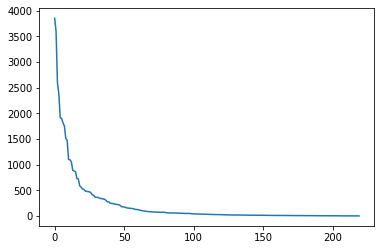

In [ ]:
plt.plot(range(len(nb)), nb)

In [ ]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s: s if str(s) in nb[:25] else 'others')

In [ ]:
nb

Williamsburg          3855
Bedford-Stuyvesant    3602
Harlem                2597
Bushwick              2380
Hell's Kitchen        1916
                      ... 
Richmondtown             1
Woodrow                  1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 220, dtype: int64

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        20955
Brooklyn         19488
Queens            5458
Bronx             1009
Staten Island      352
Name: neighbourhood_group, dtype: int64

In [ ]:
df['room_type'].value_counts()

Entire home/apt    24666
Private room       21703
Shared room          893
Name: room_type, dtype: int64

# NUMERICAL DATA VISUALIZATION

<AxesSubplot:>

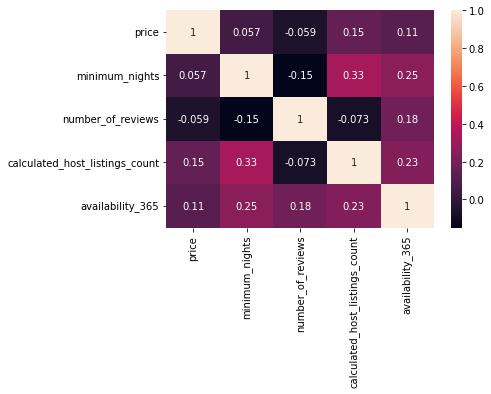

In [ ]:
sns.heatmap(data=df.corr(), annot=True)

# CATEGORICAL DATA VISUALIZATION

<AxesSubplot:xlabel='room_type', ylabel='price'>

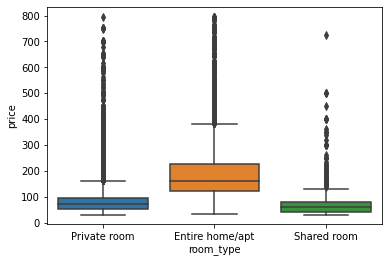

In [ ]:
sns.boxplot(data=df, x='room_type', y='price')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

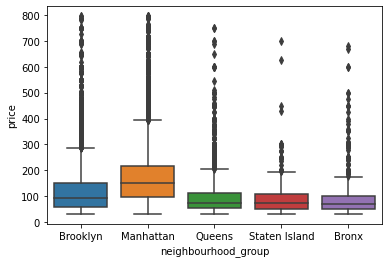

In [ ]:
sns.boxplot(data=df, x='neighbourhood_group', y='price')

<AxesSubplot:xlabel='is_zero', ylabel='price'>

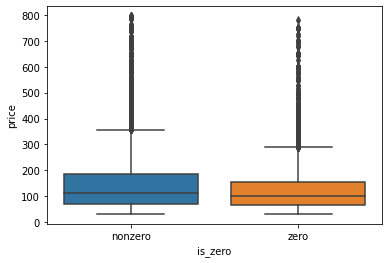

In [ ]:
sns.boxplot(data=df, x='is_zero', y='price')

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

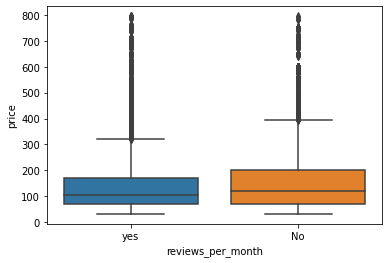

In [ ]:
sns.boxplot(data=df, x='reviews_per_month', y='price')

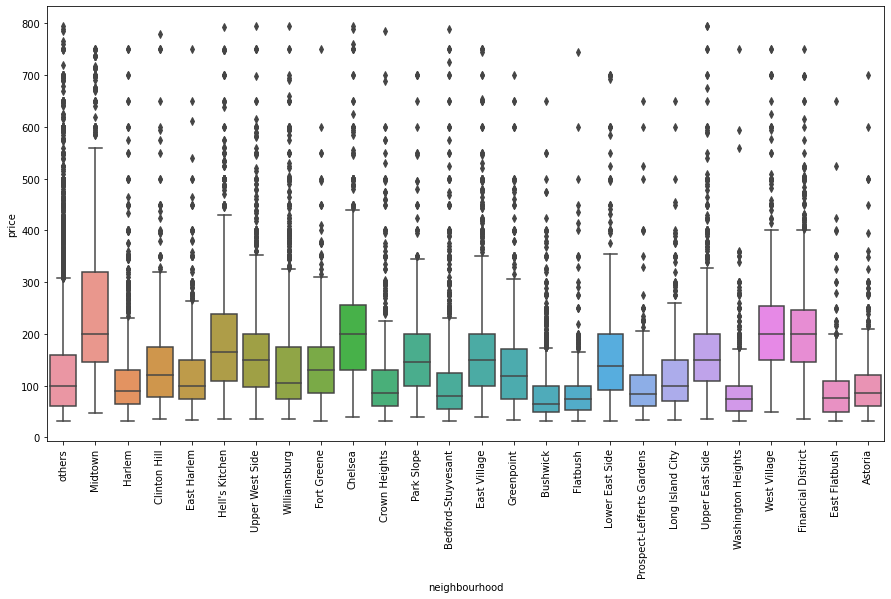

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='neighbourhood', y='price')
plt.xticks(rotation=90)
plt.show()

# DATA PREPROCESSING

In [ ]:
df = df.sample(n=10000, random_state=42)

In [ ]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,is_zero
5431,Manhattan,Financial District,Entire home/apt,275,3,9,yes,1,0,zero
8197,Manhattan,Upper East Side,Entire home/apt,175,3,0,No,1,0,zero
23318,Brooklyn,others,Entire home/apt,105,2,22,yes,1,0,zero
31398,Brooklyn,Bushwick,Private room,35,14,4,yes,1,0,zero
19113,Queens,others,Private room,43,3,69,yes,1,283,nonzero


In [ ]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_zero                           0
dtype: int64

In [ ]:
X_num = df[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
X_cat = df.drop(['minimum_nights', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le = LabelEncoder()
for i in X_cat.columns:
  X_cat[i] = le.fit_transform(X_cat[i])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y=df['price']

In [ ]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,reviews_per_month,is_zero
5431,-0.313973,-0.334785,-0.182844,-0.858443,2,9,0,1,1
8197,-0.313973,-0.535346,-0.182844,-0.858443,2,20,0,0,1
23318,-0.435119,-0.045086,-0.182844,-0.858443,1,25,0,1,1
31398,1.018629,-0.446207,-0.182844,-0.858443,1,2,1,1,1
19113,-0.313973,1.002287,-0.182844,1.300122,3,25,1,1,0


In [ ]:
X.shape

(10000, 9)

# MODEL LEARNING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle d'arbre de décision
dt = DecisionTreeRegressor()

# Entraîner le modèle sur les données d'apprentissage
dt.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = dt.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)

Mean Squared Error: 10312.600389193072
Mean Absolute Error: 60.565986110657526
Root Mean Absolute Error: 101.55097433896472
R2 score: 0.06101088883104766


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle de forêt aléatoire avec 100 arbres
rf = RandomForestRegressor()

# Entraîner le modèle sur les données d'apprentissage
rf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = rf.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6476.7696705438175
Coefficient de détermination (R²) :  0.4044885595197183
Score de variance expliquée :  0.40572164887250783
Erreur maximale :  638.18
Erreur absolue moyenne :  50.85103331798579


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer un modèle de forêt aléatoire
rf = RandomForestRegressor(random_state=1)

# Créer un objet GridSearchCV pour faire la recherche de grille sans validation croisée
grid_search = GridSearchCV(rf, param_grid)

# Entraîner le modèle sur les données avec la recherche de grille sans validation croisée
grid_search.fit(X, y)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle de forêt aléatoire sur les données avec les meilleurs hyperparamètres trouvés
best_rf = RandomForestRegressor(random_state=1, **grid_search.best_params_)
best_rf.fit(X, y)

predictions = best_rf.predict(X_test)

# Calculer le MSE et le R2 des prédictions
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Erreur quadratique moyenne :  4314.091228266287
Coefficient de détermination (R²) :  0.6033376494161338
Score de variance expliquée :  0.60333978731576
Erreur maximale :  529.8420622583523
Erreur absolue moyenne :  40.81921709995759


## random forest avec Kfold et Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer un modèle de forêt aléatoire
rf = RandomForestRegressor(random_state=1) # pour avoir un résultat cohérents si on exécute plusieurs fois le même code

# Créer un objet GridSearchCV pour faire la recherche de grille avec validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(rf, param_grid, cv=kf)

# Entraîner le modèle sur les données avec la recherche de grille avec validation croisée
grid_search.fit(X, y)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle de forêt aléatoire sur les données avec les meilleurs hyperparamètres trouvés
best_rf = RandomForestRegressor(random_state=1, **grid_search.best_params_)
best_rf.fit(X, y)

predictions = best_rf.predict(X_test)

# Calculer le MSE et le R2 des prédictions
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Erreur quadratique moyenne :  4314.091228266287
Coefficient de détermination (R²) :  0.6033376494161338
Score de variance expliquée :  0.60333978731576
Erreur maximale :  529.8420622583523
Erreur absolue moyenne :  40.81921709995759


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle Adaboost avec 100 arbres de décision
ada = AdaBoostRegressor()

# Entraîner le modèle sur les données d'apprentissage
ada.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = ada.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  9172.43623456643
Coefficient de détermination (R²) :  0.15663347739498223
Score de variance expliquée :  0.3164347652880263
Erreur maximale :  616.4219178082192
Erreur absolue moyenne :  72.07016835909123


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Convertir les données en format spécifique pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les paramètres du modèle
params = {'objective':'reg:squarederror', 'eval_metric':'rmse', 'seed':1}

# Entraîner le modèle sur les données d'apprentissage
xgb_model = xgb.train(params, dtrain)

# Faire des prédictions sur les données de test
y_pred = xgb_model.predict(dtest)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6143.192398517417
Coefficient de détermination (R²) :  0.43515957174968456
Score de variance expliquée :  0.4366007168009327
Erreur maximale :  642.7522048950195
Erreur absolue moyenne :  47.404398782730105


* Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir le modèle de Gradient Boosting Regressor avec des hyperparamètres par défaut
gbr = GradientBoostingRegressor(random_state=1)

# Entraîner le modèle sur les données d'apprentissage
gbr.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gbr.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6261.87756168091
Coefficient de détermination (R²) :  0.42847760416890834
Score de variance expliquée :  0.42853086452947364
Erreur maximale :  649.8447512701152
Erreur absolue moyenne :  48.342658779729284


* LGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir le modèle de LGBM Regressor avec des hyperparamètres par défaut
lgbm = LGBMRegressor(random_state=1)

# Entraîner le modèle sur les données d'apprentissage
lgbm.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = lgbm.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6088.698464147912
Coefficient de détermination (R²) :  0.44428368337678037
Score de variance expliquée :  0.4442875295841836
Erreur maximale :  636.913646881294
Erreur absolue moyenne :  46.856258502529776


# MODEL ANALYZING